In [2]:
import pandas as pd

df = pd.read_csv('./Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df=df.drop(columns=['Id'],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
type(df)


pandas.core.frame.DataFrame

In [7]:
df=df.drop(df[df['Species']=='Iris-setosa'].index,axis=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


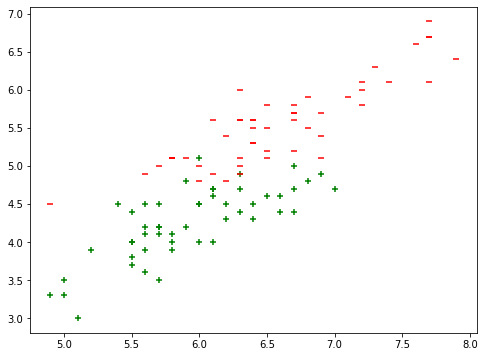

In [8]:
import matplotlib.pyplot as plt

x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [9]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
# from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
Y = []
for val in df['Species']:
    if(val == 'Iris-versicolor'):
        Y.append(-1)
    else:
        Y.append(1)

Y[0:10]

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [11]:
X=df[['SepalLengthCm','PetalLengthCm','SepalWidthCm','PetalWidthCm']]
X

,SepalLengthCm,PetalLengthCm,SepalWidthCm,PetalWidthCm
50,7.0,4.7,3.2,1.4
51,6.4,4.5,3.2,1.5
52,6.9,4.9,3.1,1.5
53,5.5,4.0,2.3,1.3
54,6.5,4.6,2.8,1.5
...,...,...,...,...
145,6.7,5.2,3.0,2.3
146,6.3,5.0,2.5,1.9
147,6.5,5.2,3.0,2.0
148,6.2,5.4,3.4,2.3


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0
